In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shapefile

import sys
sys.path.append('..')
import geo_raster_viewer

In [2]:
# Load odisha directly (if you've saved it previously)
odisha_population = geo_raster_viewer.load("odisha_population")

In [2]:
# Make our viewer. This has population count for the globe in square kilometer pixels.
viewer = geo_raster_viewer.read_tif("../data/gpw_v4_population_count_rev10_2015_30_sec.tif")

In [3]:
# Load the shapefile
india_states = shapefile.Reader("../../India Shapefiles/GADM_Shapefile_IndiaAdmin/IND_adm1.shp")

In [4]:
# I know the state we want is the 25th shape in the file
print(india_states.records()[25])
odisha = india_states.shapes()[25]

[105, 'IND', 'India', 26, 'Odisha', 'IN.OR', 0, '', 'State', 'State', '', '']


In [5]:
# Extract the shapefile region from the viewer
odisha_population = viewer.extract_shapefile(odisha)

In [6]:
# For whatever reason, there are pixels with huge negative popualtions
odisha_population.pixel_array.min()

-3.4028230607370965e+38

In [7]:
# So we'll clip the pixels to make none of them negative
odisha_population.pixel_array = np.clip(odisha_population.pixel_array, 0.0, None)

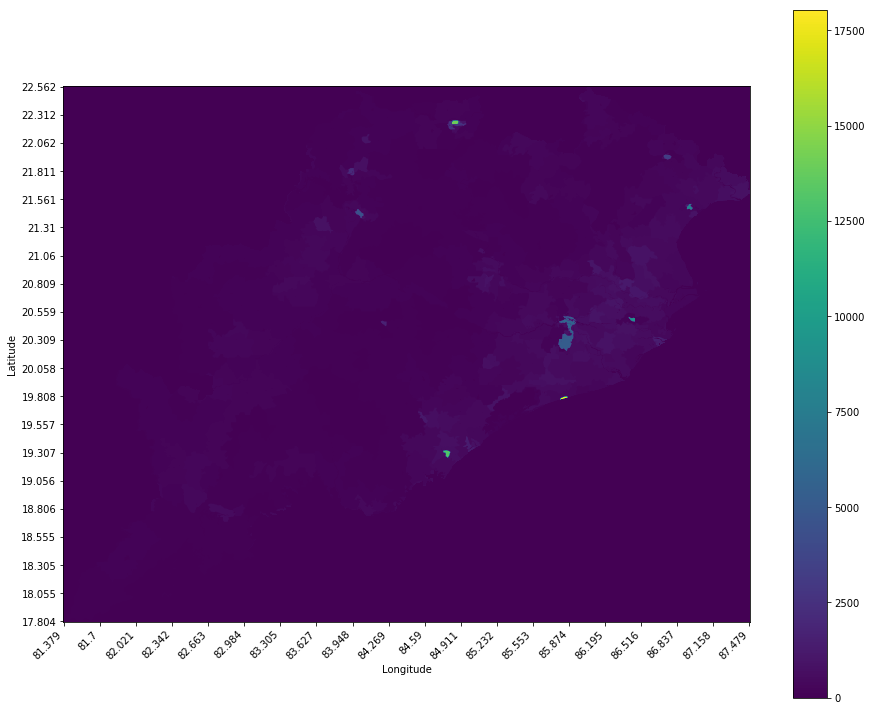

In [8]:
# Plot the region to make sure it looks good
odisha_population.plot()

In [21]:
# Load the wholesales
wholesales = pd.read_excel("../data/Geo_Wholesale_20180622_419markets.xlsx", sheet_name="full")
wholesales

DistrictName             MandiName  \
0         Anugul                 Angul   
1         Anugul  Angul (Atthamallick)   
2         Anugul      Angul (Jarapada)   
3         Anugul               Angaura   
4         Anugul             Pallahara   
5         Anugul      Talcher (Themal)   
6         Anugul               Bagedia   
7         Anugul         Balaramprasad   
8         Anugul              Banarpal   
9         Anugul               Bantala   
10        Anugul                Kosala   
11        Anugul          Mahidharpada   
12        Anugul              Maratira   
13        Anugul                 Nalco   
14        Anugul            Pitchboard   
15        Anugul            Purunagarh   
16        Anugul                 Supur   
17        Anugul                Tukuda   
18      Balangir              Bolangir   
19      Balangir  Bolangir (Patnagarh)   
20      Balangir             Kantabaji   
21      Balangir                Tusura   
22      Balangir           Bhaliamunda   
23      Balangir           Bija Khuman   
24      Balangir           Butherbahal   
25      Balangir             Chudapali   
26      Balangir             Jogimunda   
27      Balangir                Kusang   
28      Balangir               Lathore   
29      Balangir                  Roth   
..           ...                   ...   
389     Rayagada             Majhiguda   
390     Rayagada             Mukundpur   
391     Rayagada                 Tikir   
392    Sambalpur                Gosala   
393    Sambalpur              Kuchinda   
394    Sambalpur             Rairakhol   
395    Sambalpur              Sahaspur   
396    Sambalpur             Sambalpur   
397    Sambalpur           Khaliapalli   
398    Sambalpur              Maneswar   
399    Sambalpur                 Sason   
400   Subarnapur         Birmaharajpur   
401   Subarnapur          Dungurapalli   
402   Subarnapur             Pandkital   
403   Subarnapur                Binika   
404   Subarnapur              Sarsamal   
405   Sundargarh                 Bonai   
406   Sundargarh               Panposh   
407   Sundargarh             Sargipali   
408   Sundargarh              Badagaon   
409   Sundargarh              Blimunda   
410   Sundargarh             Dumabahal   
411   Sundargarh            Giringkela   
412   Sundargarh            Jhariapaly   
413   Sundargarh                Kanika   
414   Sundargarh                Kutura   
415   Sundargarh             Lathikata   
416   Sundargarh            Lephripara   
417   Sundargarh               Nuagaon   
418   Sundargarh               Vedvyas   

     LocationID \n(based on full set of 420 markets, sorted so that AgMarknet reporting markets are first, followed by ghosts)  \
0                                               301001                                                                           
1                                               301002                                                                           
2                                               301003                                                                           
3                                               301004                                                                           
4                                               301005                                                                           
5                                               301006                                                                           
6                                               301007                                                                           
7                                               301008                                                                           
8                                               301009                                                                           
9                                               301010                                             

In [24]:
# Drop the wholesales that don't have lat/lons
wholesales.dropna(subset=['Xcoord (longitude)', 'Ycoord (latitude)'], inplace=True)
wholesales.reset_index(inplace=True)

In [26]:
# Get the list of lat/lons
wholesale_markets = list(zip(wholesales['Ycoord (latitude)'].values, wholesales['Xcoord (longitude)'].values))

In [27]:
# Match pixels to the list of locations
closest_wholesales = odisha_population.match_to_closest_location(wholesale_markets)

In [28]:
# We can then get the number of people covered by each location.
people_per_market = odisha_population.sum_by_labels(closest_wholesales)
for market_index, people_served in people_per_market.items():
    print("Wholesale market {} serves: {}".format(wholesales.at[market_index, "MandiName"], people_served))

Wholesale market Angul serves: 58194.942668914795
Wholesale market Angul (Atthamallick) serves: 182198.1307888031
Wholesale market Angul (Jarapada) serves: 18444.276252746582
Wholesale market Angaura serves: 126446.36950683594
Wholesale market Pallahara serves: 167272.7098582685
Wholesale market Talcher (Themal) serves: 277108.9778108597
Wholesale market Bagedia serves: 97511.0605506897
Wholesale market Balaramprasad serves: 94448.0682296753
Wholesale market Banarpal serves: 90132.41645050049
Wholesale market Bantala serves: 95713.90996551514
Wholesale market Kosala serves: 121631.07236480713
Wholesale market Mahidharpada serves: 73455.05969238281
Wholesale market Maratira serves: 79970.51865005493
Wholesale market Nalco serves: 34717.307067871094
Wholesale market Purunagarh serves: 114907.93633854389
Wholesale market Tukuda serves: 36298.09107208252
Wholesale market Bolangir serves: 181685.5287246704
Wholesale market Bolangir (Patnagarh) serves: 119775.61560821533
Wholesale market Kan

In [29]:
# Google says the population of Odisha is ~43.73 million. Looks like we're close, even with the clipping
sum(people_per_market.values())

44478668.74223292

In [31]:
# Open the spreadsheet we're filling in and add the population served
outfile = pd.read_excel("../data/Geo_Wholesale_20180622_419markets.xlsx", sheet_name="full")
for market_index, people_served in people_per_market.items():
    out_index = outfile.index[outfile["MandiName"] == wholesales.at[market_index, "MandiName"]]
    outfile.at[out_index, "Population Served"] = people_served
writer = pd.ExcelWriter("../data/wholesales_with_pop_served.xlsx")
outfile.to_excel(writer, index=False, sheet_name="full")
writer.save()